Make sure you are using python 3

In [1]:
# check python version
from platform import python_version
print(python_version())

3.7.4


Got the New York arrest data from here:

https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2018/index.html

In [2]:
# download data
URL = 'https://www.criminaljustice.ny.gov/crimnet/ojsa/adult-arrest-demographics/2018/all.xls'
filename = 'all.xls'
from urllib.request import urlretrieve
urlretrieve(URL,filename)

('all.xls', <http.client.HTTPMessage at 0x112711e90>)

In [3]:
# make sure the downloaded file is ignored so it's not in the github folder

This dataset has the county data in different sheets. For example, this is data from the Franklin county tab.

In [4]:
import pandas as pd
# import data from the Franklin sheet. only include parts of the spreadsheet that includes data
# we are inetrested in
Franklin = pd.read_excel('all.xls', sheet_name = "Albany", skiprows = 15,nrows =2, usecols = "C,E:J")
Franklin

,Unnamed: 2,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown
0,Total Arrests,7132,3242,3035,630,75,150
1,Felony Total,2555,928,1302,254,19,52


In [5]:
# do this for all counties

In [6]:
# List of sheet names
xl = pd.ExcelFile('all.xls')

sheetnames = xl.sheet_names  # see all sheet names

sheetnames[1:5]

['NewYorkState', 'NYC', 'Non-NYC', 'Albany']

In [7]:
# check the length 
len(sheetnames)

66

In [8]:
# only get the county names. ignore first three rows
counties = sheetnames[4:66]

In [9]:
# makes sure we only have data from 62 counties
len(counties)

62

In [10]:
# create empty data frame
column_names = ["Total Arrests","White","Black","Hispanic","Asian","Other-Unknown"]
df = pd.DataFrame(columns = column_names)

In [11]:
# sort counties in alphabetical order
counties.sort()

In [12]:
# run a loop to extract data from each sheet
data = []
for c in counties:
    sheetname = c
    countydata = pd.read_excel('all.xls', sheet_name = sheetname, skiprows = 15,nrows =1, usecols = "C,E:J")
    county = [[]] * 1
    county[0].append(sheetname)
    countydata['County'] = county
    data.append(countydata)

In [13]:
df = df.append(data, True)

In [14]:
df.head()

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County
0,7132,3242,3035,630,75,150,Total Arrests,[Albany]
1,830,755,55,12,3,5,Total Arrests,[Allegany]
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx]
3,5091,3396,1236,363,45,51,Total Arrests,[Broome]
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus]


Now, get county population data from here: 
https://data.ny.gov/Government-Finance/Annual-Population-Estimates-for-New-York-State-and/krt9-ym2k

In [15]:
# get population by county
url2 = 'https://data.ny.gov/api/views/krt9-ym2k/rows.csv?accessType=DOWNLOAD&bom=true&format=true&sorting=true'
filename2 = 'population.csv'
from urllib.request import urlretrieve
urlretrieve(url2,filename2)  

('population.csv', <http.client.HTTPMessage at 0x12388c1d0>)

In [16]:
import pandas as pd

population = pd.read_csv('population.csv')
# examine data. It seems like this has data for a lot of years
population.shape

(3465, 5)

In [17]:

population.head()

,FIPS Code,Geography,Year,Program Type,Population
0,36000,New York State,2019,Postcensal Population Estimate,"19,453,561"
1,36001,Albany County,2019,Postcensal Population Estimate,"305,506"
2,36003,Allegany County,2019,Postcensal Population Estimate,"46,091"
3,36005,Bronx County,2019,Postcensal Population Estimate,"1,418,207"
4,36007,Broome County,2019,Postcensal Population Estimate,"190,488"


In [18]:
# Extract population data from 2018
population18 = population[population.Year == 2018]
len(population18)

63

In [19]:
# exclude the total population
population_c = population18[1:63]

In [20]:
len(population_c)

62

In [21]:
population_c.head()

,FIPS Code,Geography,Year,Program Type,Population
64,36001,Albany County,2018,Postcensal Population Estimate,"306,585"
65,36003,Allegany County,2018,Postcensal Population Estimate,"46,332"
66,36005,Bronx County,2018,Postcensal Population Estimate,"1,432,087"
67,36007,Broome County,2018,Postcensal Population Estimate,"191,925"
68,36009,Cattaraugus County,2018,Postcensal Population Estimate,"76,726"


In [22]:
# extract just the poulation
population_ce = population_c["Population"]
population_ce.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index

In [23]:
# combine the population with the original table
df2 = pd.concat([df,population_ce], axis=1)
df2

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585"
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332"
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087"
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925"
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726"
...,...,...,...,...,...,...,...,...,...
57,1288,1145,87,45,2,9,Total Arrests,[Washington],"61,274"
58,1527,1167,268,77,1,14,Total Arrests,[Wayne],"90,200"
59,13265,3096,5618,4164,112,275,Total Arrests,[Westchester],"968,213"
60,821,671,112,29,3,6,Total Arrests,[Wyoming],"40,023"


In [24]:
# Calculate the percentage of arrest for each race
df2['%blackarrest'] = df2['Black']/df2['Total Arrests']*100
df2['%whitearrest'] = df2['White']/df2['Total Arrests']*100
df2['%hisparrest'] = df2['Hispanic']/df2['Total Arrests']*100
df2['%asianarrest'] = df2['Asian']/df2['Total Arrests']*100
df2.head()

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275


Race demographic data was obtained from here:

https://labor.ny.gov/stats/nys/statewide-population-data.shtm

In [25]:
# get race percentage from the 2010 cencus data 
# Assuming it's similar in 2018
# using "requests" because urllib didn't work

import requests
url3 = 'https://labor.ny.gov/stats/nys/PopCompare-Race-Ethnicity-2000-2010.xls'


r = requests.get(url3)
output = open('demographic.xls', 'wb')
output.write(r.content)
output.close() 


In [26]:
demographic = pd.read_excel('demographic.xls',skiprows = 4, usecols = "A,J:M")
demographic.head()

,Area,% White*.1,% Black* .1,% Asian* .1,% Hispanic
0,New York State,0.583000,0.144000,0.073000,0.176000
1,Downstate (10 county),0.444668,0.183366,0.101227,0.246201
2,Upstate (52 county),0.828062,0.073597,0.021994,0.053038
3,Capital,0.844021,0.065007,0.026737,0.039473
4,Albany,0.759859,0.119643,0.047665,0.049036


## Cleaning up race demographic data

In [27]:
# extract
chunk1 = demographic.iloc[4:12]


chunk1.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk1.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk1

,Area,%White,%Black,%Asian,%Hispanic
0,Albany,0.759859,0.119643,0.047665,0.049036
1,Columbia,0.882338,0.042649,0.015817,0.038893
2,Greene,0.870706,0.052945,0.007761,0.049146
3,Rensselaer,0.856525,0.060165,0.021759,0.038136
4,Saratoga,0.927325,0.013902,0.017668,0.024038
5,Schenectady,0.771740,0.087431,0.031779,0.057049
6,Warren,0.952486,0.008462,0.006833,0.017928
7,Washington,0.933245,0.027430,0.004113,0.022874


In [28]:
# extract
chunk2 = demographic.iloc[13:18]


chunk2.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk2.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk2

,Area,%White,%Black,%Asian,%Hispanic
0,Cayuga,0.913428,0.037600,0.004836,0.023692
1,Cortland,0.937490,0.014290,0.008351,0.022174
2,Madison,0.938373,0.017156,0.007843,0.017919
3,Onondaga,0.792333,0.104268,0.030769,0.040317
4,Oswego,0.950716,0.007059,0.005806,0.020899


In [29]:
# extract
chunk3 = demographic.iloc[19:28]


chunk3.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk3.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk3

,Area,%White,%Black,%Asian,%Hispanic
0,Genesee,0.915295,0.024817,0.005909,0.026898
1,Livingston,0.922056,0.022801,0.011928,0.027556
2,Monroe,0.728204,0.144353,0.032274,0.072554
3,Ontario,0.918355,0.020624,0.010294,0.034087
4,Orleans,0.878157,0.055220,0.004034,0.040972
5,Seneca,0.907747,0.042921,0.006752,0.027006
6,Wayne,0.909845,0.029252,0.004959,0.037069
7,Wyoming,0.902432,0.052971,0.003701,0.029510
8,Yates,0.961457,0.007732,0.003787,0.016609


In [30]:
# extract
chunk4 = demographic.iloc[30:28]


chunk4.reset_index(drop=True,inplace=True) 
# included drop and inplace option to get rid of 
# original index
chunk4.columns = ['Area','%White','%Black','%Asian','%Hispanic']

chunk4

,Area,%White,%Black,%Asian,%Hispanic


In [31]:
chunk4 = demographic.iloc[29:36]
chunk4.reset_index(drop=True,inplace=True) 
chunk4.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk4

,Area,%White,%Black,%Asian,%Hispanic
0,Dutchess,0.745617,0.092088,0.034724,0.105103
1,Orange,0.682001,0.090917,0.023296,0.180211
2,Putnam,0.829496,0.020530,0.018373,0.116949
3,Rockland,0.653444,0.111083,0.061276,0.156513
4,Sullivan,0.745097,0.081873,0.013321,0.136098
5,Ulster,0.817012,0.054698,0.016768,0.087176
6,Westchester,0.573760,0.133372,0.053864,0.218132


In [32]:
chunk5 = demographic.iloc[37:39]
chunk5.reset_index(drop=True,inplace=True) 
chunk5.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk5

,Area,%White,%Black,%Asian,%Hispanic
0,Nassau,0.654937,0.105488,0.075816,0.145838
1,Suffolk,0.715658,0.068381,0.033679,0.164890


In [33]:
chunk6 = demographic.iloc[40:46]
chunk6.reset_index(drop=True,inplace=True) 
chunk6.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk6

,Area,%White,%Black,%Asian,%Hispanic
0,Fulton,0.938395,0.017666,0.005763,0.022744
1,Herkimer,0.956152,0.009920,0.005037,0.016119
2,Montgomery,0.850913,0.014178,0.007089,0.112587
3,Oneida,0.848330,0.058252,0.027768,0.046062
4,Otsego,0.927320,0.015387,0.010601,0.030855
5,Schoharie,0.938716,0.012031,0.006626,0.028215


In [34]:
chunk7 = demographic.iloc[47:52]
chunk7.reset_index(drop=True,inplace=True) 
chunk7.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk7

,Area,%White,%Black,%Asian,%Hispanic
0,Bronx,0.109168,0.300839,0.034174,0.535275
1,Kings,0.356652,0.319027,0.103856,0.198141
2,New York,0.480173,0.129481,0.112004,0.254483
3,Queens,0.276470,0.177468,0.227879,0.275135
4,Richmond,0.640388,0.094538,0.074023,0.172916


In [35]:
chunk8 = demographic.iloc[53:60]
chunk8.reset_index(drop=True,inplace=True) 
chunk8.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk8

,Area,%White,%Black,%Asian,%Hispanic
0,Clinton,0.911163,0.035956,0.010837,0.025010
1,Essex,0.929337,0.024943,0.006604,0.025222
2,Franklin,0.826373,0.054924,0.004167,0.029187
3,Hamilton,0.964433,0.006824,0.004963,0.010546
4,Jefferson,0.857634,0.047105,0.012596,0.052853
5,Lewis,0.968177,0.006276,0.002658,0.013180
6,St. Lawrence,0.928527,0.020180,0.009594,0.019170


In [36]:
chunk9 = demographic.iloc[61:69]
chunk9.reset_index(drop=True,inplace=True) 
chunk9.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk9

,Area,%White,%Black,%Asian,%Hispanic
0,Broome,0.862782,0.044118,0.034990,0.033789
1,Chemung,0.874063,0.062231,0.011719,0.025217
2,Chenango,0.956178,0.006399,0.003962,0.018404
3,Delaware,0.931763,0.014402,0.007566,0.032514
4,Schuyler,0.962002,0.007796,0.002780,0.012757
5,Steuben,0.944297,0.015022,0.011627,0.013850
6,Tioga,0.960489,0.006826,0.007257,0.013575
7,Tompkins,0.802351,0.037149,0.085463,0.041983


In [37]:
chunk10 = demographic.iloc[70:75]
chunk10.reset_index(drop=True,inplace=True) 
chunk10.columns = ['Area','%White','%Black','%Asian','%Hispanic']
chunk10

,Area,%White,%Black,%Asian,%Hispanic
0,Allegany,0.954133,0.010093,0.009214,0.013689
1,Cattaraugus,0.919469,0.012027,0.006524,0.016746
2,Chautauqua,0.892947,0.020481,0.005011,0.061087
3,Erie,0.777067,0.130480,0.025702,0.045407
4,Niagara,0.872675,0.067035,0.008348,0.021684


In [38]:
upchunk = pd.concat([chunk1,chunk2], axis=0)
upchunk = pd.concat([upchunk,chunk3], axis=0)
upchunk = pd.concat([upchunk,chunk4], axis=0)
upchunk = pd.concat([upchunk,chunk5], axis=0)
upchunk = pd.concat([upchunk,chunk6], axis=0)
upchunk = pd.concat([upchunk,chunk7], axis=0)
upchunk = pd.concat([upchunk,chunk8], axis=0)
upchunk = pd.concat([upchunk,chunk9], axis=0)
upchunk = pd.concat([upchunk,chunk10], axis=0)


In [39]:
upchunk = upchunk.sort_values(by=['Area'])

In [40]:
len(upchunk)

62

In [41]:
# reset index
upchunk.reset_index(drop=True,inplace=True)
# combine with last table
df3 = pd.concat([df2,upchunk], axis=1)

In [42]:
# calculate percentage of population for each race
df3['%White'] = df3['%White']*100
df3['%Black'] = df3['%Black']*100
df3['%Asian'] = df3['%Asian']*100
df3['%Hispanic'] = df3['%Hispanic']*100

df3

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest,Area,%White,%Black,%Asian,%Hispanic
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516,Albany,75.985852,11.964340,4.766538,4.903617
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446,Allegany,95.413313,1.009276,0.921424,1.368855
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344,Bronx,10.916766,30.083936,3.417423,53.527451
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913,Broome,86.278166,4.411765,3.499003,3.378863
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275,Cattaraugus,91.946910,1.202734,0.652415,1.674614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1288,1145,87,45,2,9,Total Arrests,[Washington],"61,274",6.75466,88.8975,3.49379,0.15528,Washington,93.324475,2.742976,0.411288,2.287396
58,1527,1167,268,77,1,14,Total Arrests,[Wayne],"90,200",17.5508,76.4244,5.04257,0.0654879,Wayne,90.984516,2.925180,0.495884,3.706863
59,13265,3096,5618,4164,112,275,Total Arrests,[Westchester],"968,213",42.3521,23.3396,31.3909,0.844327,Westchester,57.375992,13.337190,5.386398,21.813209
60,821,671,112,29,3,6,Total Arrests,[Wyoming],"40,023",13.6419,81.7296,3.53228,0.365408,Wyoming,90.243150,5.297118,0.370063,2.951014


In [43]:
df3['blackarr/pop'] = df3['%blackarrest']/df3['%Black']
df3['whitearr/pop'] = df3['%whitearrest']/df3['%White']
df3

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest,Area,%White,%Black,%Asian,%Hispanic,blackarr/pop,whitearr/pop
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516,Albany,75.985852,11.964340,4.766538,4.903617,3.55679,0.598231
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446,Allegany,95.413313,1.009276,0.921424,1.368855,6.56561,0.953366
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344,Bronx,10.916766,30.083936,3.417423,53.527451,1.50291,0.34409
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913,Broome,86.278166,4.411765,3.499003,3.378863,5.50304,0.77315
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275,Cattaraugus,91.946910,1.202734,0.652415,1.674614,7.34919,0.844688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1288,1145,87,45,2,9,Total Arrests,[Washington],"61,274",6.75466,88.8975,3.49379,0.15528,Washington,93.324475,2.742976,0.411288,2.287396,2.46253,0.952564
58,1527,1167,268,77,1,14,Total Arrests,[Wayne],"90,200",17.5508,76.4244,5.04257,0.0654879,Wayne,90.984516,2.925180,0.495884,3.706863,5.99989,0.839971
59,13265,3096,5618,4164,112,275,Total Arrests,[Westchester],"968,213",42.3521,23.3396,31.3909,0.844327,Westchester,57.375992,13.337190,5.386398,21.813209,3.17549,0.406784
60,821,671,112,29,3,6,Total Arrests,[Wyoming],"40,023",13.6419,81.7296,3.53228,0.365408,Wyoming,90.243150,5.297118,0.370063,2.951014,2.57534,0.90566


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from plotnine import *



In [45]:
# remove the commas
df3 = df3.replace(',','', regex=True)


In [46]:
df3.dtypes

Total Arrests      int64
White              int64
Black              int64
Hispanic           int64
Asian              int64
Other-Unknown      int64
Unnamed: 2        object
County            object
Population        object
%blackarrest     float64
%whitearrest     float64
%hisparrest      float64
%asianarrest     float64
Area              object
%White           float64
%Black           float64
%Asian           float64
%Hispanic        float64
blackarr/pop     float64
whitearr/pop     float64
dtype: object

In [47]:
# convert to numbers
df3['%White'] = df3['%White'].astype('int64')
df3['%Black'] = df3['%Black'].astype('int64')
df3['%Hispanic'] = df3['%Hispanic'].astype('int64')
df3['%Asian'] = df3['%Asian'].astype('int64')
df3['blackarr/pop'] = df3['blackarr/pop'].astype('int64')
df3['whitearr/pop'] = df3['whitearr/pop'].astype('int64')
df3['%blackarrest'] = df3['%blackarrest'].astype('int64')
df3['%whitearrest'] = df3['%whitearrest'].astype('int64')
df3['%hisparrest'] = df3['%hisparrest'].astype('int64')
df3['%asianarrest'] = df3['%asianarrest'].astype('int64')
# Can't convert object to int directly. need to convert to float first
df3['Population'] = df3['Population'].astype(float)
df3['Population'] = df3['Population'].astype('int64')

In [48]:
df3.dtypes

Total Arrests     int64
White             int64
Black             int64
Hispanic          int64
Asian             int64
Other-Unknown     int64
Unnamed: 2       object
County           object
Population        int64
%blackarrest      int64
%whitearrest      int64
%hisparrest       int64
%asianarrest      int64
Area             object
%White            int64
%Black            int64
%Asian            int64
%Hispanic         int64
blackarr/pop      int64
whitearr/pop      int64
dtype: object

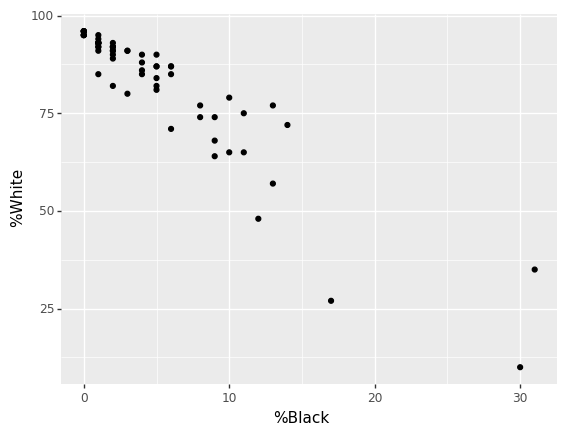

<ggplot: (7022247797)>

In [49]:
ggplot(df3, aes(x= '%Black', y='%White')) + geom_point()

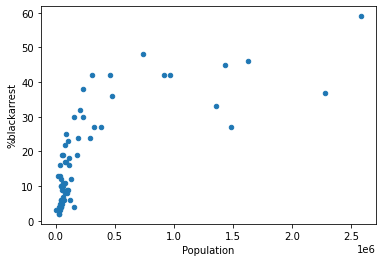

In [50]:
df3.plot(kind='scatter', x='Population', y='%blackarrest')

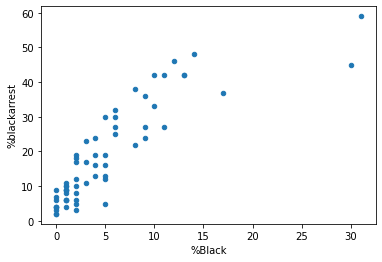

In [51]:
df3.plot(kind='scatter', x='%Black', y='%blackarrest')

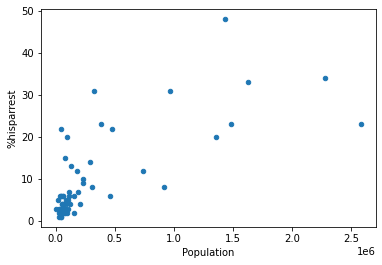

In [52]:
df3.plot(kind='scatter', x='Population', y='%hisparrest')

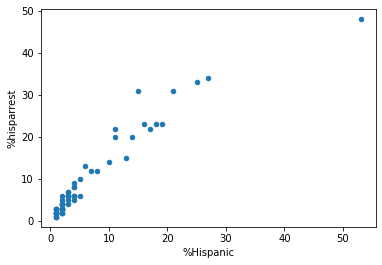

In [53]:
df3.plot(kind='scatter', x='%Hispanic', y='%hisparrest')

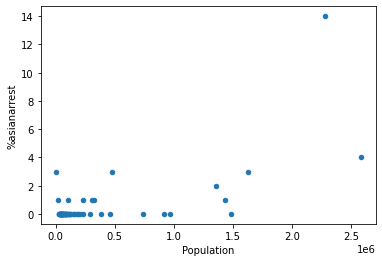

In [54]:
df3.plot(kind='scatter', x='Population', y='%asianarrest')

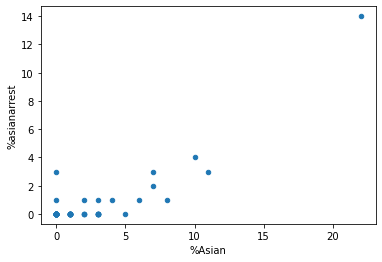

In [55]:
df3.plot(kind='scatter', x='%Asian', y='%asianarrest')

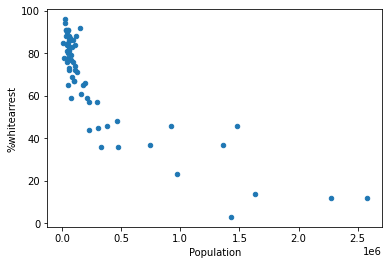

In [56]:
df3.plot(kind='scatter', x='Population', y='%whitearrest')

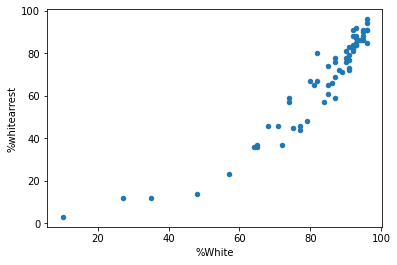

In [57]:
df3.plot(kind='scatter', x='%White', y='%whitearrest')

# Repeate for felony data

In [58]:
# List of sheet names
xl = pd.ExcelFile('all.xls')
sheetnames = xl.sheet_names  

counties = sheetnames[4:66]
column_names = ["Unnamed: 2","Total Arrests","White","Black","Hispanic","Asian","Other-Unknown"]
felony_df = pd.DataFrame(columns = column_names)
# run a loop to extract data from each sheet
data2 = []
for c in counties:
    sheetname = c
    countydata = pd.read_excel('all.xls', sheet_name = sheetname, skiprows = 15,nrows =2, usecols = "C,E:J")
    county = [[]] * 2
    county[0].append(sheetname)
    countydata['County'] = county
    data2.append(countydata)


In [59]:
felony_df = felony_df.append(data2, True)
felony_df.columns = ["category","Total Arrests","White","Black","Hispanic","Asian","Other-Unknown","County"]
felony_df.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County
0,Total Arrests,7132,3242,3035,630,75,150,[Albany]
1,Felony Total,2555,928,1302,254,19,52,[Albany]
2,Total Arrests,830,755,55,12,3,5,[Allegany]
3,Felony Total,257,234,17,5,1,0,[Allegany]
4,Total Arrests,47413,1781,21437,23196,618,381,[Bronx]


In [60]:
# Extract felony data
felony_df = felony_df.loc[felony_df.category == 'Felony Total',:]

In [61]:
felony_df.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County
1,Felony Total,2555,928,1302,254,19,52,[Albany]
3,Felony Total,257,234,17,5,1,0,[Allegany]
5,Felony Total,15731,506,7230,7698,194,103,[Bronx]
7,Felony Total,1428,842,467,96,8,15,[Broome]
9,Felony Total,563,417,74,8,3,61,[Cattaraugus]


In [62]:

felony_df.reset_index(drop=True,inplace=True)

# add population data
felony_df2 = pd.concat([felony_df,population_ce], axis=1)
felony_df2.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population
0,Felony Total,2555,928,1302,254,19,52,[Albany],"306,585"
1,Felony Total,257,234,17,5,1,0,[Allegany],"46,332"
2,Felony Total,15731,506,7230,7698,194,103,[Bronx],"1,432,087"
3,Felony Total,1428,842,467,96,8,15,[Broome],"191,925"
4,Felony Total,563,417,74,8,3,61,[Cattaraugus],"76,726"


In [63]:
upchunk.head()

,Area,%White,%Black,%Asian,%Hispanic
0,Albany,0.759859,0.119643,0.047665,0.049036
1,Allegany,0.954133,0.010093,0.009214,0.013689
2,Bronx,0.109168,0.300839,0.034174,0.535275
3,Broome,0.862782,0.044118,0.034990,0.033789
4,Cattaraugus,0.919469,0.012027,0.006524,0.016746


In [64]:
# add demographic data
felony_df3 = pd.concat([felony_df2,upchunk], axis=1)

In [65]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,%White,%Black,%Asian,%Hispanic
0,Felony Total,2555,928,1302,254,19,52,[Albany],"306,585",Albany,0.759859,0.119643,0.047665,0.049036
1,Felony Total,257,234,17,5,1,0,[Allegany],"46,332",Allegany,0.954133,0.010093,0.009214,0.013689
2,Felony Total,15731,506,7230,7698,194,103,[Bronx],"1,432,087",Bronx,0.109168,0.300839,0.034174,0.535275
3,Felony Total,1428,842,467,96,8,15,[Broome],"191,925",Broome,0.862782,0.044118,0.034990,0.033789
4,Felony Total,563,417,74,8,3,61,[Cattaraugus],"76,726",Cattaraugus,0.919469,0.012027,0.006524,0.016746


In [66]:
felony_df3['%White'] = felony_df3['%White']*100
felony_df3['%Black'] = felony_df3['%Black']*100
felony_df3['%Hispanic'] = felony_df3['%Hispanic']*100
felony_df3['%Asian'] = felony_df3['%Asian']*100

In [67]:

# remove the commas
felony_df3 = felony_df3.replace(',','', regex=True)
# convert to numbers
felony_df3['%White'] = felony_df3['%White'].astype('float')
felony_df3['%Black'] = felony_df3['%Black'].astype('float')
felony_df3['%Hispanic'] = felony_df3['%Hispanic'].astype('float')
felony_df3['%Asian'] = felony_df3['%Asian'].astype('float')


# Can't convert object to int directly. need to convert to float first
felony_df3['Population'] = felony_df3['Population'].astype(float)


felony_df3['White'] = felony_df3['White'].astype(float)
felony_df3['Black'] = felony_df3['Black'].astype(float)
felony_df3['Hispanic'] = felony_df3['Hispanic'].astype(float)
felony_df3['Asian'] = felony_df3['Asian'].astype(float)

In [68]:
# Calculate the percentage of arrest for each race
felony_df3['%blackarrest'] = felony_df3['Black']/felony_df3['Total Arrests']*100
felony_df3['%whitearrest'] = felony_df3['White']/felony_df3['Total Arrests']*100
felony_df3['%hisparrest'] = felony_df3['Hispanic']/felony_df3['Total Arrests']*100
felony_df3['%asianarrest'] = felony_df3['Asian']/ felony_df3['Total Arrests']*100



In [69]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,%White,%Black,%Asian,%Hispanic,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,Felony Total,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,75.985852,11.964340,4.766538,4.903617,50.958904,36.320939,9.941292,0.743640
1,Felony Total,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,95.413313,1.009276,0.921424,1.368855,6.614786,91.050584,1.945525,0.389105
2,Felony Total,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,10.916766,30.083936,3.417423,53.527451,45.960206,3.216579,48.935223,1.233234
3,Felony Total,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,86.278166,4.411765,3.499003,3.378863,32.703081,58.963585,6.722689,0.560224
4,Felony Total,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,91.946910,1.202734,0.652415,1.674614,13.143872,74.067496,1.420959,0.532860


In [70]:
felony_df3.dtypes

category          object
Total Arrests      int64
White            float64
Black            float64
Hispanic         float64
Asian            float64
Other-Unknown      int64
County            object
Population       float64
Area              object
%White           float64
%Black           float64
%Asian           float64
%Hispanic        float64
%blackarrest     float64
%whitearrest     float64
%hisparrest      float64
%asianarrest     float64
dtype: object

In [71]:
felony_df3['Population']

0      306585.0
1       46332.0
2     1432087.0
3      191925.0
4       76726.0
        ...    
57      61274.0
58      90200.0
59     968213.0
60      40023.0
61      24951.0
Name: Population, Length: 62, dtype: float64

In [72]:
felony_df3['%White']

0     75.985852
1     95.413313
2     10.916766
3     86.278166
4     91.946910
        ...    
57    93.324475
58    90.984516
59    57.375992
60    90.243150
61    96.145653
Name: %White, Length: 62, dtype: float64

In [73]:
felony_df3['Population']*felony_df3['%White']

0     2.329612e+07
1     4.420690e+06
2     1.563376e+07
3     1.655894e+07
4     7.054719e+06
          ...     
57    5.718364e+06
58    8.206803e+06
59    5.555218e+07
60    3.611802e+06
61    2.398930e+06
Length: 62, dtype: float64

In [74]:
# Calculate "R factor"
felony_df3['R factor'] = (felony_df3['Population']/(felony_df3['Population']*felony_df3['%White']))/(felony_df3['Total Arrests']/felony_df3['White'])

In [75]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,%White,%Black,%Asian,%Hispanic,%blackarrest,%whitearrest,%hisparrest,%asianarrest,R factor
0,Felony Total,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,75.985852,11.964340,4.766538,4.903617,50.958904,36.320939,9.941292,0.743640,0.004780
1,Felony Total,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,95.413313,1.009276,0.921424,1.368855,6.614786,91.050584,1.945525,0.389105,0.009543
2,Felony Total,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,10.916766,30.083936,3.417423,53.527451,45.960206,3.216579,48.935223,1.233234,0.002946
3,Felony Total,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,86.278166,4.411765,3.499003,3.378863,32.703081,58.963585,6.722689,0.560224,0.006834
4,Felony Total,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,91.946910,1.202734,0.652415,1.674614,13.143872,74.067496,1.420959,0.532860,0.008055


In [76]:
# Calculate percent arrest/ percent population
felony_df3['White/pop'] = felony_df3['%whitearrest']/felony_df3['%White']*100
felony_df3['Black/pop'] = felony_df3['%blackarrest']/felony_df3['%Black']*100
felony_df3['Hispanic/pop'] = felony_df3['%hisparrest']/felony_df3['%Hispanic']*100
felony_df3['Asian/pop'] = felony_df3['%asianarrest']/felony_df3['%Asian']*100




In [77]:
print (type(felony_df2.loc[0, 'County']))

<class 'list'>


In [78]:
#remove brackets from counthy
felony_df2['County'] = felony_df2['County'].str.join(', ')

In [79]:
felony_df2[(felony_df2.County == "Broome")]

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population
3,Felony Total,1428,842,467,96,8,15,Broome,"191,925"


In [80]:

data3 = []
for c in counties:
    if (c == 'Bronx'or c=='Kings'or c == 'NewYork'or c == 'Queens'or c == 'Richmond'):
        data3.append('NY city')
    else:
        data3.append('others')


In [81]:
counties2 = pd.DataFrame(counties)

In [82]:
counties2['city'] = data3
counties2.head()

,0,city
0,Albany,others
1,Allegany,others
2,Bronx,NY city
3,Broome,others
4,Cattaraugus,others


In [83]:
felony_df3['city'] = data3

In [84]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,...,%blackarrest,%whitearrest,%hisparrest,%asianarrest,R factor,White/pop,Black/pop,Hispanic/pop,Asian/pop,city
0,Felony Total,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,...,50.958904,36.320939,9.941292,0.743640,0.004780,47.799608,425.923246,202.733838,15.601258,others
1,Felony Total,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,...,6.614786,91.050584,1.945525,0.389105,0.009543,95.427547,655.399423,142.127882,42.228683,others
2,Felony Total,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,...,45.960206,3.216579,48.935223,1.233234,0.002946,29.464575,152.773249,91.420800,36.086657,NY city
3,Felony Total,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,...,32.703081,58.963585,6.722689,0.560224,0.006834,68.341260,741.269841,198.963032,16.010963,others
4,Felony Total,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,...,13.143872,74.067496,1.420959,0.532860,0.008055,80.554632,1092.832688,84.852919,81.674983,others


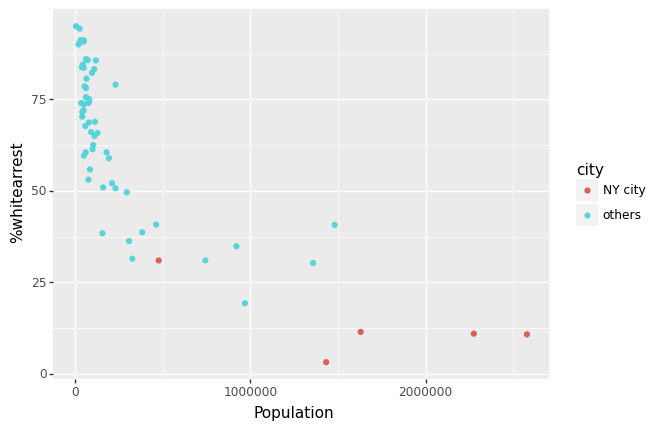

<ggplot: (306627345)>

In [85]:
ggplot(felony_df3, aes(x= 'Population', y='%whitearrest',color = 'city')) + geom_point()

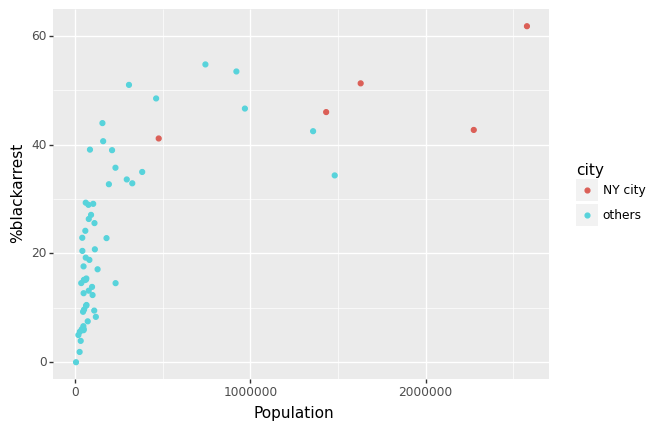

<ggplot: (306729945)>

In [86]:
ggplot(felony_df3, aes(x= 'Population', y='%blackarrest',color = 'city')) + geom_point()

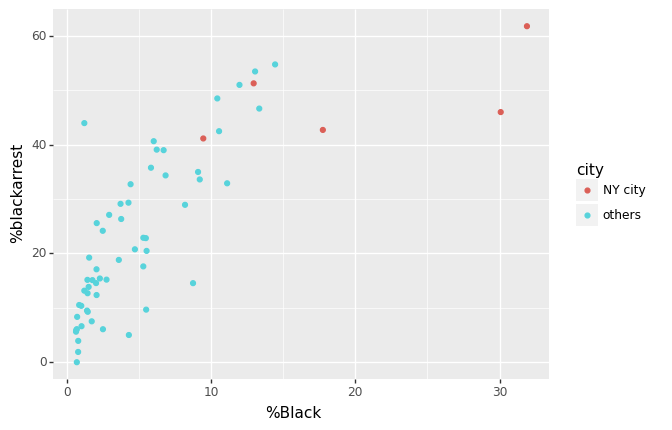

<ggplot: (7023581605)>

In [87]:
ggplot(felony_df3, aes(x= '%Black', y='%blackarrest',color = 'city')) + geom_point()

In [88]:
#felony_df2.to_excel(r'felony_df2.xlsx', index = False)

In [89]:
felony_df4 = felony_df3[['County','Population','%blackarrest','%whitearrest','%hisparrest','%asianarrest']]
felony_df4.head()

,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,[Albany],306585.0,50.958904,36.320939,9.941292,0.743640
1,[Allegany],46332.0,6.614786,91.050584,1.945525,0.389105
2,[Bronx],1432087.0,45.960206,3.216579,48.935223,1.233234
3,[Broome],191925.0,32.703081,58.963585,6.722689,0.560224
4,[Cattaraugus],76726.0,13.143872,74.067496,1.420959,0.532860


In [90]:
felony_df4 = pd.melt(felony_df3, id_vars=['County','Population'], var_name = 'race')

In [92]:
felony_df5 = felony_df3[['County','Population','%White','%Black','%blackarrest','%whitearrest','%hisparrest','%asianarrest']]
felony_df5.head()

,County,Population,%White,%Black,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,[Albany],306585.0,75.985852,11.964340,50.958904,36.320939,9.941292,0.743640
1,[Allegany],46332.0,95.413313,1.009276,6.614786,91.050584,1.945525,0.389105
2,[Bronx],1432087.0,10.916766,30.083936,45.960206,3.216579,48.935223,1.233234
3,[Broome],191925.0,86.278166,4.411765,32.703081,58.963585,6.722689,0.560224
4,[Cattaraugus],76726.0,91.946910,1.202734,13.143872,74.067496,1.420959,0.532860


In [93]:
felony_df6 = pd.melt(felony_df5, id_vars=['County','Population','%White','%Black'], var_name = 'race')
felony_df6.head()

,County,Population,%White,%Black,race,value
0,[Albany],306585.0,75.985852,11.964340,%blackarrest,50.958904
1,[Allegany],46332.0,95.413313,1.009276,%blackarrest,6.614786
2,[Bronx],1432087.0,10.916766,30.083936,%blackarrest,45.960206
3,[Broome],191925.0,86.278166,4.411765,%blackarrest,32.703081
4,[Cattaraugus],76726.0,91.946910,1.202734,%blackarrest,13.143872


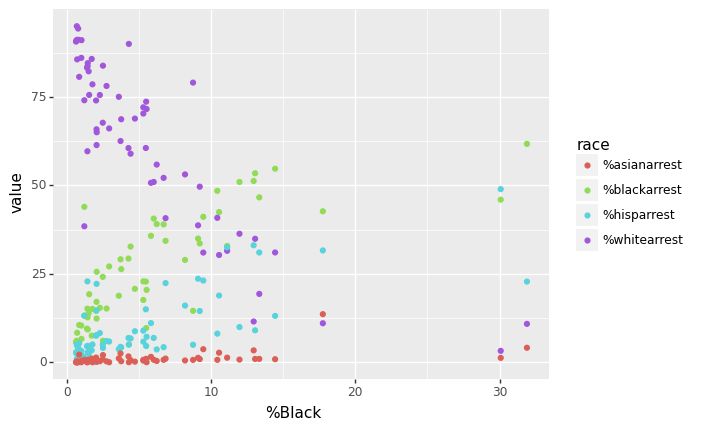

<ggplot: (7023321361)>

In [94]:
ggplot(felony_df6, aes(x="%Black", y="value", color='race')) + geom_point() 

In [95]:
felony_df8 = felony_df3[['County','Population','%White','White/pop','Black/pop','Hispanic/pop','Asian/pop']]
felony_df8.head()

,County,Population,%White,White/pop,Black/pop,Hispanic/pop,Asian/pop
0,[Albany],306585.0,75.985852,47.799608,425.923246,202.733838,15.601258
1,[Allegany],46332.0,95.413313,95.427547,655.399423,142.127882,42.228683
2,[Bronx],1432087.0,10.916766,29.464575,152.773249,91.420800,36.086657
3,[Broome],191925.0,86.278166,68.341260,741.269841,198.963032,16.010963
4,[Cattaraugus],76726.0,91.946910,80.554632,1092.832688,84.852919,81.674983


In [96]:
felony_df9 = pd.melt(felony_df8, id_vars=['County','Population','%White'], var_name = 'race')
felony_df9.head()

,County,Population,%White,race,value
0,[Albany],306585.0,75.985852,White/pop,47.799608
1,[Allegany],46332.0,95.413313,White/pop,95.427547
2,[Bronx],1432087.0,10.916766,White/pop,29.464575
3,[Broome],191925.0,86.278166,White/pop,68.341260
4,[Cattaraugus],76726.0,91.946910,White/pop,80.554632


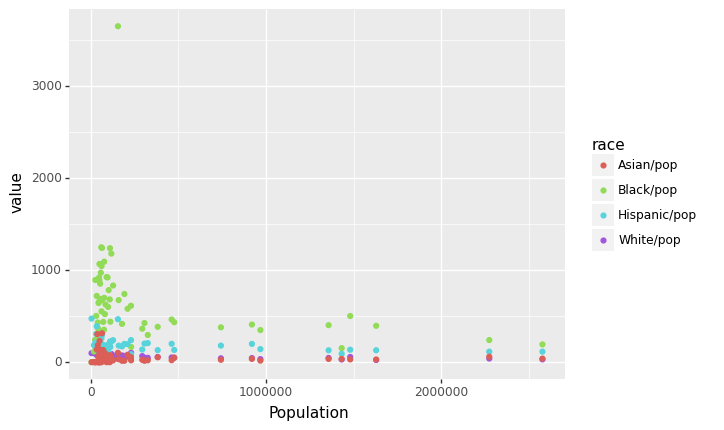

<ggplot: (7023323301)>

In [97]:
ggplot(felony_df9, aes(x="Population", y="value", color='race')) + geom_point() 

https://www.criminaljustice.ny.gov/crimnet/ojsa/comparison-population-arrests-prison-demographics.html

convert pdf to excel
https://simplypdf.com/Excel

In [98]:

first = pd.read_excel('prison.xlsx',sheet_name = 5,nrows=6)

first


,Allegany County,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Race/Ethnicity,Population,NaN,Arrests,NaN,Felony Arrests,NaN,Prison Sentences,NaN
1,NaN,#,% of Total,#,% of Total,#,% of Total,#,% of Total
2,White,43781,0.94,755,0.91,234,0.91,16,0.94
3,Black,593,0.01,55,0.07,17,0.07,0,0
4,Hispanic,779,0.02,12,0.01,5,0.02,1,0.06
5,Asian,593,0.01,3,0,1,0,0,0


In [99]:
xl2 = pd.ExcelFile('prison.xlsx')

sheetnames = xl2.sheet_names  # see all sheet names

sheets = sheetnames[4:66]


In [100]:
# run a loop to extract data from each sheet
data3 = []
for s in sheets:
    sheetname = s
    countydata = pd.read_excel('prison.xlsx', sheet_name = sheetname, skiprows = 2,nrows = 5)
    data3.append(countydata)
    

In [101]:

prison_df = pd.DataFrame()
prison_df = prison_df.append(data3,True)

In [102]:
prison_df.columns = ['race','population','%population','arrest','%arrest','felonyarrest','%felony','prison','%prison']
prison_df.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00


In [103]:
#prison_df2.to_excel(r'prison_df.xlsx', index = False)

In [104]:
xl = pd.ExcelFile('all.xls')
countynames = xl.sheet_names  # see all sheet names
countynames = countynames[4:66]
County = []
for c in countynames:
    countyname = c
    county = [[]] * 5
    county[0].append(c)
    County.append(county)
County = pd.DataFrame(County)
County = County.unstack()
County = County.sort_values()
len(County)

310

In [105]:
County

0  0     [Albany]
1  0     [Albany]
4  0     [Albany]
2  0     [Albany]
3  0     [Albany]
           ...   
   61     [Yates]
1  61     [Yates]
0  61     [Yates]
2  61     [Yates]
4  61     [Yates]
Length: 310, dtype: object

In [106]:
County.reset_index(drop=True,inplace=True)

In [107]:
prison_df['County'] = County

In [108]:
prison_df['County'] = prison_df['County'].str.join(', ')

In [109]:
prison_df.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany


In [110]:
felony_df3.head()

,category,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,County,Population,Area,...,%blackarrest,%whitearrest,%hisparrest,%asianarrest,R factor,White/pop,Black/pop,Hispanic/pop,Asian/pop,city
0,Felony Total,2555,928.0,1302.0,254.0,19.0,52,[Albany],306585.0,Albany,...,50.958904,36.320939,9.941292,0.743640,0.004780,47.799608,425.923246,202.733838,15.601258,others
1,Felony Total,257,234.0,17.0,5.0,1.0,0,[Allegany],46332.0,Allegany,...,6.614786,91.050584,1.945525,0.389105,0.009543,95.427547,655.399423,142.127882,42.228683,others
2,Felony Total,15731,506.0,7230.0,7698.0,194.0,103,[Bronx],1432087.0,Bronx,...,45.960206,3.216579,48.935223,1.233234,0.002946,29.464575,152.773249,91.420800,36.086657,NY city
3,Felony Total,1428,842.0,467.0,96.0,8.0,15,[Broome],191925.0,Broome,...,32.703081,58.963585,6.722689,0.560224,0.006834,68.341260,741.269841,198.963032,16.010963,others
4,Felony Total,563,417.0,74.0,8.0,3.0,61,[Cattaraugus],76726.0,Cattaraugus,...,13.143872,74.067496,1.420959,0.532860,0.008055,80.554632,1092.832688,84.852919,81.674983,others


In [111]:
tpopulation = felony_df3['Population']
tpop = []
for p in tpopulation:
    population = [[]] * 5
    population[0].append(p)
    tpop.append(population)
tpop = pd.DataFrame(tpop)





In [112]:
tpop = tpop.stack()
tpop.reset_index(drop=True,inplace=True)

In [113]:
tpop
    

0      [306585.0]
1      [306585.0]
2      [306585.0]
3      [306585.0]
4      [306585.0]
          ...    
305     [24951.0]
306     [24951.0]
307     [24951.0]
308     [24951.0]
309     [24951.0]
Length: 310, dtype: object

In [114]:
prison_df['totpopulation'] = tpop

In [115]:
print (type(prison_df.loc[0, 'totpopulation']))

<class 'list'>


In [116]:
prison_df

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany,[306585.0]
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany,[306585.0]
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany,[306585.0]
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany,[306585.0]
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany,[306585.0]
...,...,...,...,...,...,...,...,...,...,...,...
305,White,23532,0.95,300,0.94,100,0.94,17,0.85,Yates,[24951.0]
306,Black,220,0.01,9,0.03,2,0.02,1,0.05,Yates,[24951.0]
307,Hispanic,574,0.02,8,0.03,3,0.03,2,0.10,Yates,[24951.0]
308,Asian,201,0.01,0,0.00,0,0.00,0,0.00,Yates,[24951.0]


In [117]:
prison_df2 = prison_df

In [118]:
prison_df2['totpopulation'] = prison_df2['totpopulation'].str[0]

In [119]:
prison_df2.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation
0,White,220533,0.72,3242,0.45,928,0.36,95,0.26,Albany,306585.0
1,Black,39292,0.13,3035,0.43,1302,0.51,222,0.61,Albany,306585.0
2,Hispanic,18737,0.06,630,0.09,254,0.10,47,0.13,Albany,306585.0
3,Asian,20640,0.07,75,0.01,19,0.01,0,0.00,Albany,306585.0
4,Other-Unknown,7915,0.03,150,0.02,52,0.02,0,0.00,Albany,306585.0


In [120]:
prison_df2.dtypes

race              object
population         int64
%population      float64
arrest             int64
%arrest          float64
felonyarrest       int64
%felony          float64
prison             int64
%prison          float64
County            object
totpopulation    float64
dtype: object

In [121]:
prison_df2['population'] = prison_df2['population'].astype(float)
prison_df2['arrest'] = prison_df2['arrest'].astype(float)
prison_df2['felonyarrest'] = prison_df2['felonyarrest'].astype(float)
prison_df2['prison'] = prison_df2['prison'].astype(float)


In [122]:
df2.head()

,Total Arrests,White,Black,Hispanic,Asian,Other-Unknown,Unnamed: 2,County,Population,%blackarrest,%whitearrest,%hisparrest,%asianarrest
0,7132,3242,3035,630,75,150,Total Arrests,[Albany],"306,585",42.5547,45.4571,8.83343,1.0516
1,830,755,55,12,3,5,Total Arrests,[Allegany],"46,332",6.62651,90.9639,1.44578,0.361446
2,47413,1781,21437,23196,618,381,Total Arrests,[Bronx],"1,432,087",45.2133,3.75635,48.9233,1.30344
3,5091,3396,1236,363,45,51,Total Arrests,[Broome],"191,925",24.2781,66.706,7.13023,0.883913
4,1697,1318,150,36,10,183,Total Arrests,[Cattaraugus],"76,726",8.83913,77.6665,2.12139,0.589275


In [123]:
tpopulation = felony_df3['Population']
tpop = []
for p in tpopulation:
    population = [[]] * 5
    population[0].append(p)
    tpop.append(population)
tpop = pd.DataFrame(tpop)

In [124]:
tarrests = df2['Total Arrests']
tarrest = []
for a in tarrests:
    arrest = [[]] * 5
    arrest[0].append(a)
    tarrest.append(arrest)
tarrest = pd.DataFrame(tarrest)

tarrest = tarrest.stack()
tarrest.reset_index(drop=True,inplace=True)

prison_df2['totarrests'] = tarrest
prison_df2['totarrests'] = prison_df2['totarrests'].str[0]

In [125]:
prison_df2.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation,totarrests
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany,306585.0,7132
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany,306585.0,7132
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany,306585.0,7132
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany,306585.0,7132
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany,306585.0,7132


In [126]:



prison_df2['R factor arrest'] = (prison_df2['totpopulation']/prison_df2['population'])/(prison_df2['totarrests']/prison_df2['arrest'])








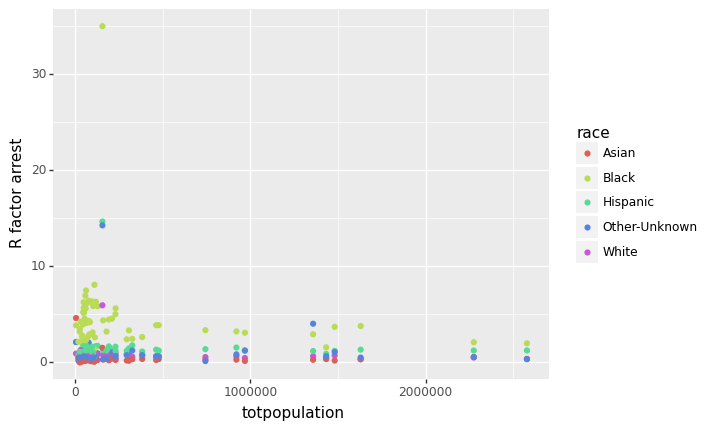

<ggplot: (7024422137)>

In [127]:
ggplot(prison_df2, aes(x="totpopulation", y="R factor arrest", color='race')) + geom_point() 

In [128]:
prison_df2.head()


,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation,totarrests,R factor arrest
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany,306585.0,7132,0.631945
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany,306585.0,7132,3.320428
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany,306585.0,7132,1.445373
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany,306585.0,7132,0.156204
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany,306585.0,7132,0.814667


In [129]:
broome = prison_df2[(prison_df2.County == "Broome") & (prison_df2.race == "White")]


In [130]:
Schenectady = prison_df2[(prison_df2.County == "Schenectady")]


In [131]:
counties[45]


'Saratoga'

In [132]:
pSchenectady = Schenectady['prison']

In [133]:

counties

['Albany',
 'Allegany',
 'Bronx',
 'Broome',
 'Cattaraugus',
 'Cayuga',
 'Chautauqua',
 'Chemung',
 'Chenango',
 'Clinton',
 'Columbia',
 'Cortland',
 'Delaware',
 'Dutchess',
 'Erie',
 'Essex',
 'Franklin',
 'Fulton',
 'Genesee',
 'Greene',
 'Hamilton',
 'Herkimer',
 'Jefferson',
 'Kings',
 'Lewis',
 'Livingston',
 'Madison',
 'Monroe',
 'Montgomery',
 'Nassau',
 'NewYork',
 'Niagara',
 'Oneida',
 'Onondaga',
 'Ontario',
 'Orange',
 'Orleans',
 'Oswego',
 'Otsego',
 'Putnam',
 'Queens',
 'Rensselaer',
 'Richmond',
 'Rockland',
 'StLawrence',
 'Saratoga',
 'Schenectady',
 'Schoharie',
 'Schuyler',
 'Seneca',
 'Steuben',
 'Suffolk',
 'Sullivan',
 'Tioga',
 'Tompkins',
 'Ulster',
 'Warren',
 'Washington',
 'Wayne',
 'Westchester',
 'Wyoming',
 'Yates']

In [134]:
row = prison_df2.iloc[1,:]
row['prison']

222.0

In [135]:
tprison = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['prison']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tprison.append(mult)
tprison = pd.DataFrame(tprison)

tprison = tprison.stack()
tprison.reset_index(drop=True,inplace=True)

prison_df2['totprison'] = tprison

prison_df2['totprison'] = prison_df2['totprison'].str[0]


In [136]:
tfelony = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c)]
    toadd = rows['felonyarrest']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    tfelony.append(mult)
tfelony = pd.DataFrame(tfelony)

tfelony = tfelony.stack()
tfelony.reset_index(drop=True,inplace=True)

prison_df2['totfelony'] = tfelony
prison_df2['totfelony'] = prison_df2['totfelony'].str[0]

In [137]:
#prison_df2.to_excel('prison_df2.xls', index = False)

In [138]:


perwhite = []
for c in counties:
    rows = prison_df2[(prison_df2.County == c) & (prison_df2.race == "White")]
    toadd = rows['%population']
    tot = sum(toadd)
    mult = [[]] * 5
    mult[0].append(tot)
    perwhite.append(mult)
perwhite = pd.DataFrame(perwhite)

perwhite = perwhite.stack()
perwhite.reset_index(drop=True,inplace=True)

prison_df2['%white'] = perwhite
prison_df2['%white'] = prison_df2['%white'].str[0]


In [139]:
prison_df2.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation,totarrests,R factor arrest,totprison,totfelony,%white
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany,306585.0,7132,0.631945,364.0,2555.0,0.72
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany,306585.0,7132,3.320428,364.0,2555.0,0.72
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany,306585.0,7132,1.445373,364.0,2555.0,0.72
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany,306585.0,7132,0.156204,364.0,2555.0,0.72
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany,306585.0,7132,0.814667,364.0,2555.0,0.72


In [140]:
prison_df2['R factor prison'] = (prison_df2['totpopulation']/prison_df2['population'])/(prison_df2['totprison']/prison_df2['prison'])

prison_df2['R factor felony'] = (prison_df2['totpopulation']/prison_df2['population'])/(prison_df2['totfelony']/prison_df2['felonyarrest'])


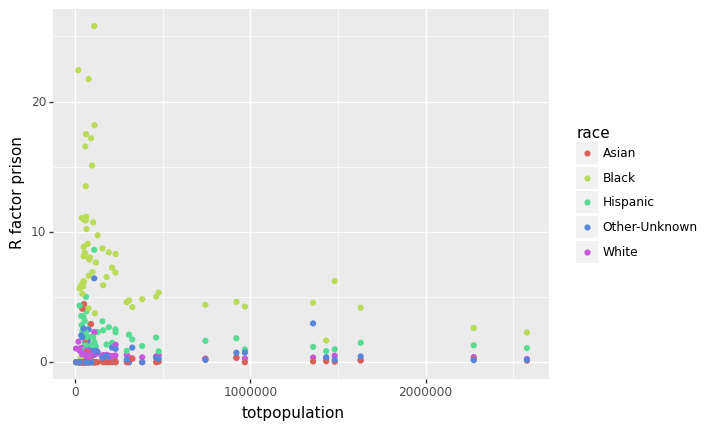

<ggplot: (305205889)>

In [141]:
ggplot(prison_df2, aes(x="totpopulation", y="R factor prison", color='race')) + geom_point() 

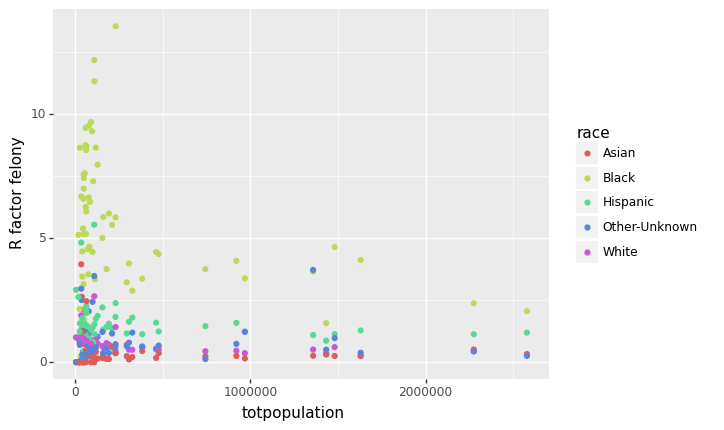

<ggplot: (7023364289)>

In [142]:
ggplot(prison_df2, aes(x="totpopulation", y="R factor felony", color='race')) + geom_point() 

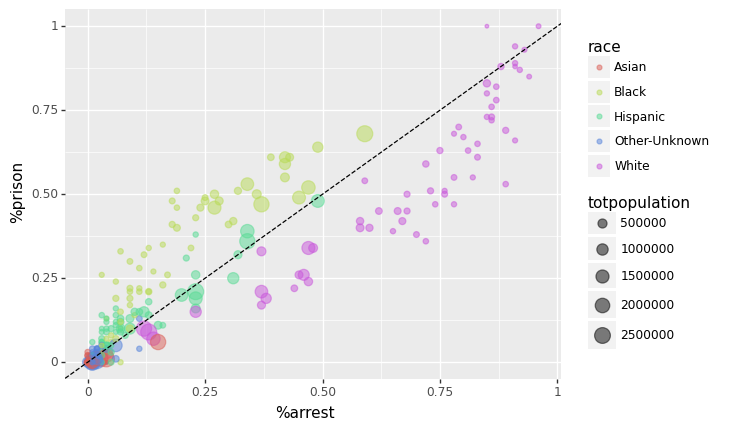

<ggplot: (304942821)>

In [143]:
(ggplot(prison_df2, aes(x="%arrest", y="%prison", color='race', size ='totpopulation')) 
 + geom_point(alpha=0.5) 
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
)

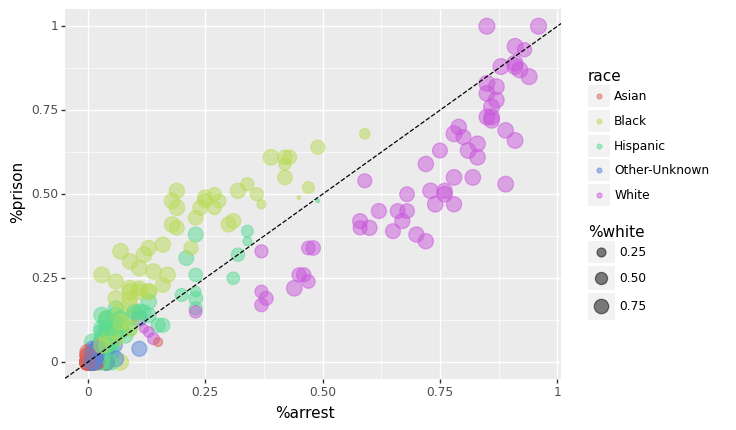

<ggplot: (7023206945)>

In [144]:
(ggplot(prison_df2, aes(x="%arrest", y="%prison", color='race', size ='%white')) 
 + geom_point(alpha=0.5) 
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
)

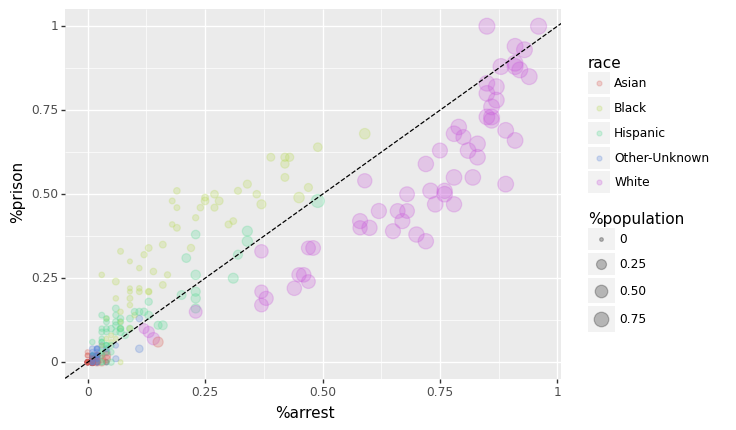

<ggplot: (7024164861)>

In [145]:
(ggplot(prison_df2, aes(x="%arrest", y="%prison", color='race', size ='%population')) 
 + geom_point(alpha=0.25) 
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
)

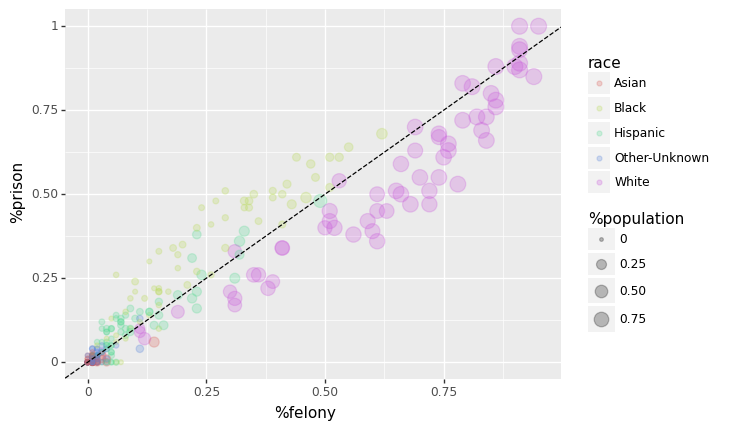

<ggplot: (7023552269)>

In [146]:
(ggplot(prison_df2, aes(x="%felony", y="%prison", color='race', size = '%population')) 
 + geom_point(alpha=0.25) 
 + geom_abline(intercept = 0 , slope = 1,linetype="dashed")
)

In [147]:
prison_df2['arr/pop'] = prison_df2['arrest']/prison_df2['population']



In [148]:
racedems = []
whiteper = prison_df2['%white']

for w in whiteper:
    if w > 0.5:
        racedem = 'white >0.5'
    else:
        racedem = 'white <=0.5'
    racedems.append(racedem)    


prison_df2['racedem'] = racedems


In [149]:
prison_df2.head()

,race,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,County,totpopulation,totarrests,R factor arrest,totprison,totfelony,%white,R factor prison,R factor felony,arr/pop,racedem
0,White,220533.0,0.72,3242.0,0.45,928.0,0.36,95.0,0.26,Albany,306585.0,7132,0.631945,364.0,2555.0,0.72,0.362827,0.504934,0.014701,white >0.5
1,Black,39292.0,0.13,3035.0,0.43,1302.0,0.51,222.0,0.61,Albany,306585.0,7132,3.320428,364.0,2555.0,0.72,4.758810,3.976187,0.077242,white >0.5
2,Hispanic,18737.0,0.06,630.0,0.09,254.0,0.10,47.0,0.13,Albany,306585.0,7132,1.445373,364.0,2555.0,0.72,2.112746,1.626648,0.033623,white >0.5
3,Asian,20640.0,0.07,75.0,0.01,19.0,0.01,0.0,0.00,Albany,306585.0,7132,0.156204,364.0,2555.0,0.72,0.000000,0.110460,0.003634,white >0.5
4,Other-Unknown,7915.0,0.03,150.0,0.02,52.0,0.02,0.0,0.00,Albany,306585.0,7132,0.814667,364.0,2555.0,0.72,0.000000,0.788338,0.018951,white >0.5


In [171]:
forcolum = prison_df2.groupby(['racedem','race']).sum()

In [172]:
forcolum

population  %population    arrest  %arrest  \
racedem     race                                                        
white <=0.5 Asian           1184446.0         0.55   10926.0     0.24   
            Black           1804163.0         0.89   94525.0     1.88   
            Hispanic        2360562.0         1.29   68001.0     1.40   
            Other-Unknown    166253.0         0.08    1857.0     0.04   
            White           2407145.0         1.17   21431.0     0.43   
white >0.5  Asian            525737.0         1.36    2196.0     0.46   
            Black           1029745.0         2.82   62527.0    10.08   
            Hispanic        1393568.0         3.71   28853.0     4.78   
            Other-Unknown    247211.0         1.30    4450.0     1.13   
            White           8423379.0        48.86  114650.0    41.67   

                           felonyarrest  %felony  prison  %prison  \
racedem     race                                                    
white <=0.5 Asian                3985.0     0.22   118.0     0.09   
            Black               38290.0     2.02  2809.0     2.16   
            Hispanic            24252.0     1.37  1901.0     1.44   
            Other-Unknown         563.0     0.04    34.0     0.01   
            White                6978.0     0.37   368.0     0.29   
white >0.5  Asian                 693.0     0.43    30.0     0.18   
            Black               23558.0    13.04  3696.0    17.96   
            Hispanic             8749.0     5.13  1141.0     6.09   
            Other-Unknown        1289.0     1.03   113.0     0.83   
            White               29859.0    38.43  3445.0    32.88   

                           totpopulation  totarrests  R factor arrest  \
racedem     race                                                        
white <=0.5 Asian              7913821.0      196740         1.520581   
            Black              7913821.0      196740         9.366711   
            Hispanic           7913821.0      196740         4.620197   
            Other-Unknown      7913821.0      196740         1.945761   
            White              7913821.0      196740         1.556722   
white >0.5  Asian             11616530.0      212676        27.961370   
            Black             11616530.0      212676       267.904324   
            Hispanic          11616530.0      212676        85.170030   
            Other-Unknown     11616530.0      212676        56.737756   
            White             11616530.0      212676        52.674355   

                           totprison  totfelony  %white  R factor prison  \
racedem     race                                                           
white <=0.5 Asian             5230.0    74068.0    1.17         0.559690   
            Black             5230.0    74068.0    1.17        10.746066   
            Hispanic          5230.0    74068.0    1.17         4.717310   
            Other-Unknown     5230.0    74068.0    1.17         1.159290   
            White             5230.0    74068.0    1.17         1.089560   
white >0.5  Asian             8425.0    64148.0   48.86        17.608090   
            Black             8425.0    64148.0   48.86       480.887714   
            Hispanic          8425.0    64148.0   48.86       117.011861   
            Other-Unknown     8425.0    64148.0   48.86        40.827195   
            White             8425.0    64148.0   48.86        40.067700   

                           R factor felony   arr/pop  
racedem     race                                      
white <=0.5 Asian                 1.418354  0.037946  
            Black                10.117039  0.251832  
            Hispanic              4.464244  0.119205  
            Other-Unknown         1.578576  0.052344  
            White                 1.333690  0.039787  
white >0.5  Asian                28.017819  0.548860  
            Black               334.517944  4.808428  
            Hispanic             90.

In [264]:
perarrest = []
lowtotr = prison_df2[(prison_df2.racedem == 'white <=0.5')]
lowtot = sum(lowtotr['arrest'])
lowwhiter = prison_df2[(prison_df2.racedem == 'white <=0.5')&(prison_df2.race == 'White')]
lowwhite = sum(lowwhiter['arrest'])
perlowwhite = lowwhite/lowtot
perarrest.append(perlowwhite)
lowblackr = prison_df2[(prison_df2.racedem == 'white <=0.5')&(prison_df2.race == 'Black')]
lowblack = sum(lowblackr['arrest'])
perlowblack = lowblack/lowtot
perarrest.append(perlowblack)
lowhispr = prison_df2[(prison_df2.racedem == 'white <=0.5')&(prison_df2.race == 'Hispanic')]
lowhisp = sum(lowhispr['arrest'])
perlowhisp = lowhisp/lowtot
perarrest.append(perlowhisp)
lowasianr = prison_df2[(prison_df2.racedem == 'white <=0.5')&(prison_df2.race == 'Asian')]
lowasian = sum(lowasianr['arrest'])
perlowasian = lowasian/lowtot
perarrest.append(perlowasian)
lowunknownr = prison_df2[(prison_df2.racedem == 'white <=0.5')&(prison_df2.race == 'Other-Unknown')]
lowunknown = sum(lowunknownr['arrest'])
perlowunknown = lowunknown/lowtot
perarrest.append(perlowunknown)

perarrestlow = perarrest




In [272]:
perarrest = []

hightotr = prison_df2[(prison_df2.racedem == 'white >0.5')]
hightot = sum(hightotr['arrest'])
highwhiter = prison_df2[(prison_df2.racedem == 'white >0.5')&(prison_df2.race == 'White')]
highwhite = sum(highwhiter['arrest'])
perhighwhite = highwhite/hightot
perarrest.append(perhighwhite)
highblackr = prison_df2[(prison_df2.racedem == 'white >0.5')&(prison_df2.race == 'Black')]
highblack = sum(highblackr['arrest'])
perhighblack = highblack/hightot
perarrest.append(perhighblack)
highhispr = prison_df2[(prison_df2.racedem == 'white >0.5')&(prison_df2.race == 'Hispanic')]
highhisp = sum(highhispr['arrest'])
perhighhisp = highhisp/hightot
perarrest.append(perhighhisp)
highasianr = prison_df2[(prison_df2.racedem == 'white >0.5')&(prison_df2.race == 'Asian')]
highasian = sum(highasianr['arrest'])
perhighasian = highasian/hightot
perarrest.append(perhighasian)
highunknownr = prison_df2[(prison_df2.racedem == 'white >0.5')&(prison_df2.race == 'Other-Unknown')]
highunknown = sum(highunknownr['arrest'])
perhighunknown = highunknown/hightot
perarrest.append(perhighunknown)

perarresthigh = perarrest

In [274]:
perarresthigh

[0.5390829242603773,
 0.2940012037089281,
 0.13566645977919464,
 0.010325565649156463,
 0.02092384660234347]

In [280]:
perarrest = pd.DataFrame(perarresthigh)
perarrest['perarrestlow'] = perarrestlow

perarrest.columns = ['white <=0.5','white >0.5']
race = ['white','black','hispanic','asian','unknown']
perarrest['race'] = race
perarrest

,white <=0.5,white >0.5,race
0,0.539083,0.108931,white
1,0.294001,0.480456,black
2,0.135666,0.345639,hispanic
3,0.010326,0.055535,asian
4,0.020924,0.009439,unknown


In [284]:
perarrest = pd.melt(perarrest,id_vars=['race'], value_vars=['white <=0.5','white >0.5'])

In [285]:
perarrest

,race,variable,value
0,white,white <=0.5,0.539083
1,black,white <=0.5,0.294001
2,hispanic,white <=0.5,0.135666
3,asian,white <=0.5,0.010326
4,unknown,white <=0.5,0.020924
5,white,white >0.5,0.108931
6,black,white >0.5,0.480456
7,hispanic,white >0.5,0.345639
8,asian,white >0.5,0.055535
9,unknown,white >0.5,0.009439


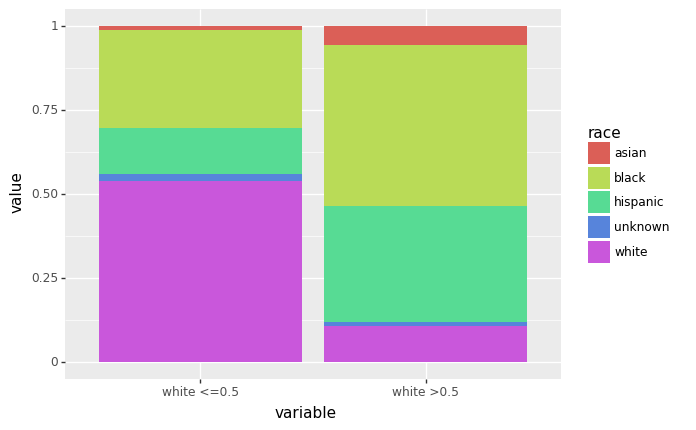

<ggplot: (306691641)>

In [286]:
(ggplot(perarrest, aes(x='variable', y='value', fill='race'))
 + geom_col() 
)

In [173]:
prison_df2.groupby(['racedem']).sum()

,population,%population,arrest,%arrest,felonyarrest,%felony,prison,%prison,totpopulation,totarrests,R factor arrest,totprison,totfelony,%white,R factor prison,R factor felony,arr/pop
racedem,,,,,,,,,,,,,,,,,
white <=0.5,7922569.0,3.98,196740.0,3.99,74068.0,4.02,5230.0,3.99,39569105.0,983700,19.009972,26150.0,370340.0,5.85,18.271916,18.911903,0.501114
white >0.5,11619640.0,58.05,212676.0,58.12,64148.0,58.06,8425.0,57.94,58082650.0,1063380,490.447836,42125.0,320740.0,244.30,696.402560,549.376086,8.666160


In [235]:
forcolum.reset_index().racedem

0    white <=0.5
1    white <=0.5
2    white <=0.5
3    white <=0.5
4    white <=0.5
5     white >0.5
6     white >0.5
7     white >0.5
8     white >0.5
9     white >0.5
Name: racedem, dtype: object

In [236]:
forcolum['arrest'] 

racedem      race         
white <=0.5  Asian             10926.0
             Black             94525.0
             Hispanic          68001.0
             Other-Unknown      1857.0
             White             21431.0
white >0.5   Asian              2196.0
             Black             62527.0
             Hispanic          28853.0
             Other-Unknown      4450.0
             White            114650.0
Name: arrest, dtype: float64

In [197]:
rows = prison_df2[(prison_df2.racedem == 'white >0.5')]
toadd = rows['arrest']
tot = sum(toadd)
tot

212676.0

In [241]:
perarrest = []
arrest = forcolum['arrest']
perar = arrest[0:5]/196740
perarrest.append(perar)
perar2 = arrest[5:10]/212676
perarrest.append(perar2)

In [238]:
len(arrest)

10

In [239]:
len(perarrest)

2

In [219]:
arrest[0:5]

racedem      race         
white <=0.5  Asian            10926.0
             Black            94525.0
             Hispanic         68001.0
             Other-Unknown     1857.0
             White            21431.0
Name: arrest, dtype: float64

In [220]:
arrest[5:10]

racedem     race         
white >0.5  Asian              2196.0
            Black             62527.0
            Hispanic          28853.0
            Other-Unknown      4450.0
            White            114650.0
Name: arrest, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'perarrest'

In [221]:
perarrest

[racedem      race         
 white <=0.5  Asian            0.055535
              Black            0.480456
              Hispanic         0.345639
              Other-Unknown    0.009439
              White            0.108931
 Name: arrest, dtype: float64,
 racedem     race         
 white >0.5  Asian            0.010326
             Black            0.294001
             Hispanic         0.135666
             Other-Unknown    0.020924
             White            0.539083
 Name: arrest, dtype: float64]

In [224]:
pd.DataFrame(perarrest)

racedem white <=0.5                                             white >0.5  \
race          Asian     Black  Hispanic Other-Unknown     White      Asian   
arrest     0.055535  0.480456  0.345639      0.009439  0.108931        NaN   
arrest          NaN       NaN       NaN           NaN       NaN   0.010326   

racedem                                              
race        Black  Hispanic Other-Unknown     White  
arrest        NaN       NaN           NaN       NaN  
arrest   0.294001  0.135666      0.020924  0.539083

In [222]:
len(perarrest)

2

In [184]:
len(forcolum)

10

In [208]:
len(perarrest)

2

In [ ]:
forcolum['perarrest'] = perarr

In [ ]:
(ggplot(prison_df2, aes(x='racedem', y='arr/pop', fill='race'))
 + geom_col()
)

In [ ]:
(ggplot(prison_df2, aes(x="%white", y="arr/pop", color='race', size = 'totpopulation')) 
 + geom_point(alpha=0.5) 
)

In [ ]:
(ggplot(prison_df2, aes(x="%white", y="%prison", color='race',size='totpopulation')) 
 + geom_point(alpha=0.5) 
)

In [ ]:
felony_df2.plot(kind='scatter', x='Population', y='%hisparrest')

In [ ]:
felony_df2.plot(kind='scatter', x='%Black', y='%blackarrest')

In [ ]:
felony_df2.plot(kind='scatter', x='%White', y='%whitearrest')

In [ ]:
felony_df2.plot(kind='scatter', x='%Asian', y='%asianarrest')

In [ ]:
felony_df2.plot(kind='scatter', x='%Hispanic', y='%hisparrest')